In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

style.use('ggplot')
%matplotlib inline

In [157]:
"""
There are NaN values we have to take care of as we see off the bat.
"""
df = pd.read_csv('data/movie_metadata.csv', 
                 header = 0)

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [158]:
df.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [159]:
"""
Lets see how many null values there are 
"""
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [160]:
def genreRemap(row):
    global df_genre
    d = {}
    genres = np.array(row['genres'].split('|'))
    n = genres.size
    d['budget'] = [row['budget']]*n
    d['gross'] = [row['gross']]*n
    d['year'] = [row['title_year']]*n
    d['genre'], d['cgenres'] = [], []
    for genre in genres:
        d['genre'].append(genre)
        d['cgenres'].append(genres[genres != genre])
    df_genre = df_genre.append(pd.DataFrame(d), ignore_index = True)

In [161]:
"""
Quick Clean
"""
df = df.drop_duplicates(['movie_title'])
df_clean = df[['budget', 'genres', 'gross', 'title_year']].dropna()

df_genre = pd.DataFrame(columns = ['genre', 'cgenres', 'budget', 'gross', 'year'])

df_clean.apply(genreRemap, axis = 1)
df_genre['year'] = df_genre['year'].astype(np.int16)
df_genre = df_genre[['genre', 'budget', 'gross', 'year', 'cgenres']]

# Initial Visualization

## Cast and Director Features

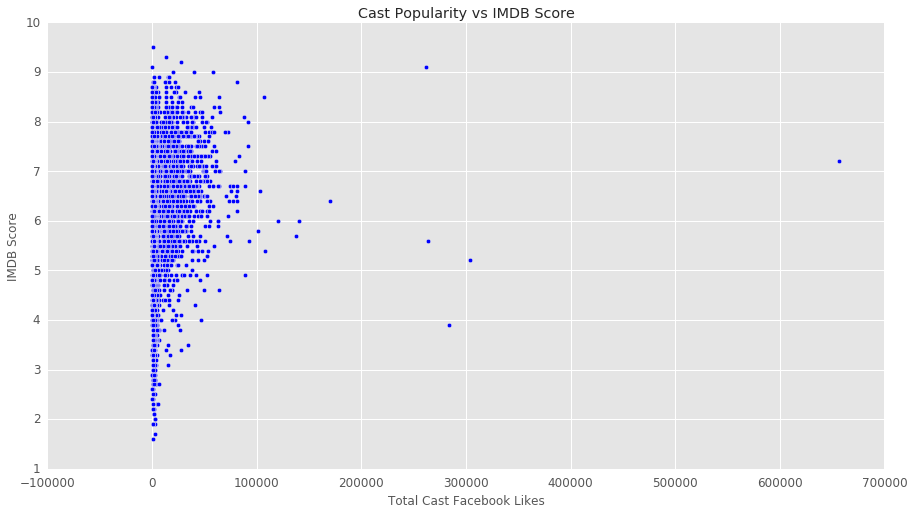

In [162]:
"""
ACTORS 1,2,3 TOGETHER:

For less than 200,000 likes, it seems the higher popularity the higher the IMDB score.
Sporatic for higher popularity, which isn't what we'd expect.
"""
plt.figure(figsize = (15,8))
plt.title('Cast Popularity vs IMDB Score')
plt.xlabel('Total Cast Facebook Likes')
plt.ylabel('IMDB Score')
plt.scatter(df['cast_total_facebook_likes'],df['imdb_score'])
plt.tick_params(which = 'both', labelsize= 12)

plt.show()

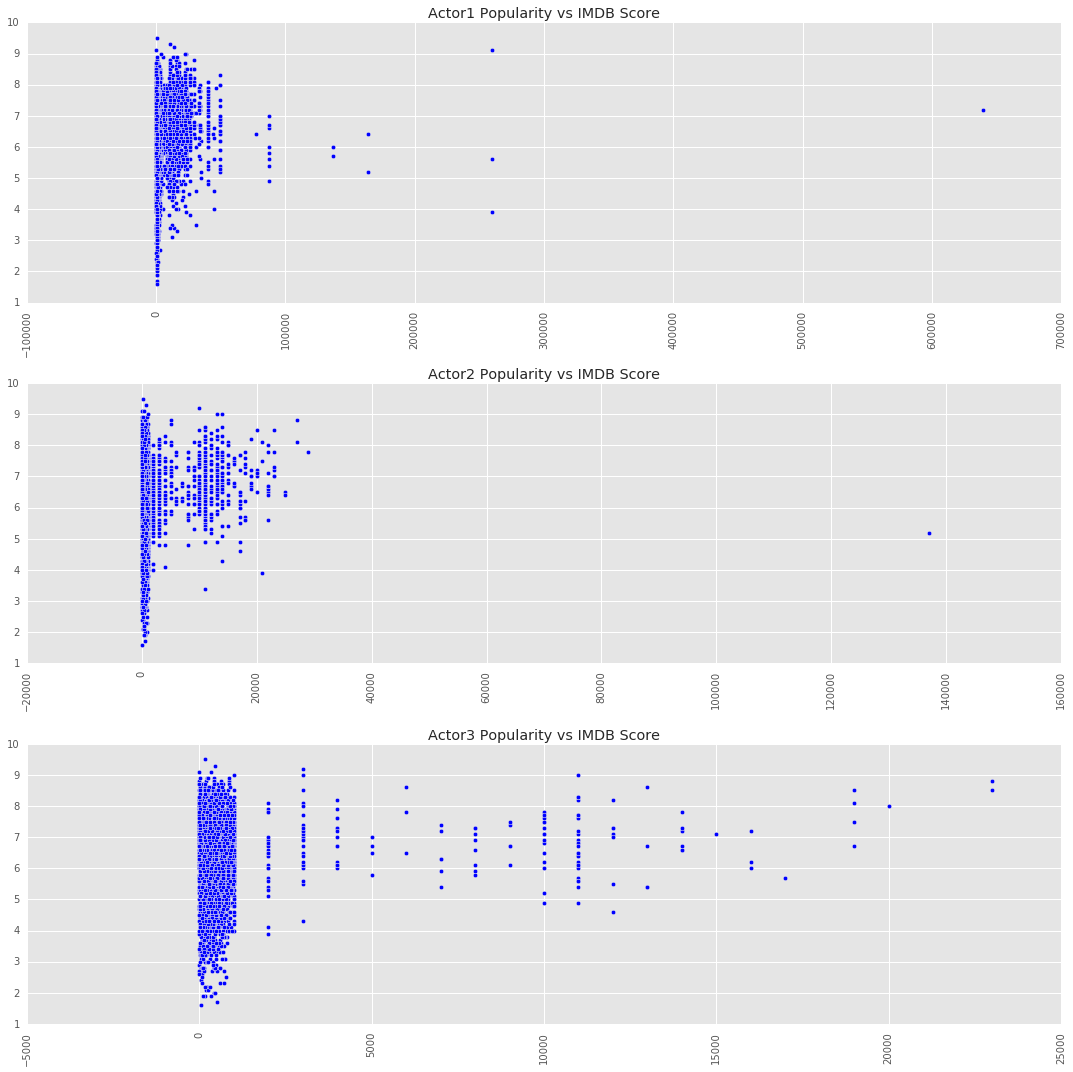

In [163]:
"""
ACTORS 1,2,3 SEPERATE:

Seems like actor3 shows distinction. 
Actor1 and Actor2 show that having a higher popularity isn't a bad idea. 
After researching, Actor1 and Actor2 are the main actors.

"""
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,15))
ax1.scatter(df['actor_1_facebook_likes'],df[['actor_1_facebook_likes','imdb_score']]['imdb_score'], label = 'A1')
ax1.set_title('Actor1 Popularity vs IMDB Score')


ax2.scatter(df['actor_2_facebook_likes'],df[['actor_2_facebook_likes','imdb_score']]['imdb_score'], label = 'A2')
ax2.set_title('Actor2 Popularity vs IMDB Score')

ax3.scatter(df['actor_3_facebook_likes'],df[['actor_3_facebook_likes','imdb_score']]['imdb_score'], label = 'A3')
ax3.set_title('Actor3 Popularity vs IMDB Score')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

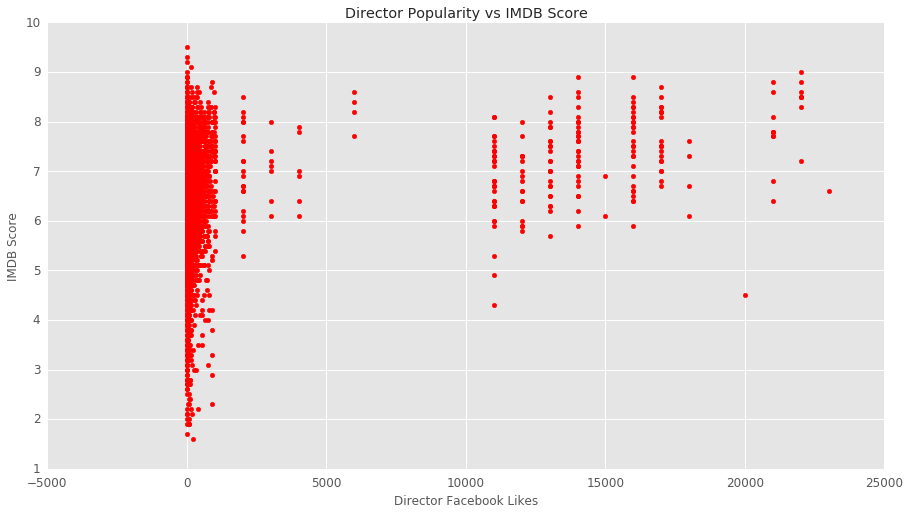

In [164]:
"""
DIRECTORS:

There seems to be a slight upward trend.
This also seems like directors should be categorized into two seperate groups.
"""
plt.figure(figsize = (15,8))
plt.title('Director Popularity vs IMDB Score')
plt.xlabel('Director Facebook Likes')
plt.ylabel('IMDB Score')
plt.scatter(df['director_facebook_likes'],df['imdb_score'],color = 'r')
plt.tick_params(which = 'both', labelsize= 12)

plt.show()

In [174]:
def create_comparison_database(name, value, x, no_films):
    
    comparison_df = df.groupby(name, as_index=False)
    
    if x == 'mean':
        comparison_df = comparison_df.mean()
    elif x == 'median':
        comparison_df = comparison_df.median()
    elif x == 'sum':
        comparison_df = comparison_df.sum() 
    
    # Create database with either name of directors or actors, the value being compared i.e. 'gross',
    # and number of films they're listed with. Then sort by value being compared.
    name_count_key = df[name].value_counts().to_dict()
    comparison_df['films'] = comparison_df[name].map(name_count_key)
    comparison_df.sort_values(value, ascending=False, inplace=True)
    comparison_df[name] = comparison_df[name].map(str) + " (" + comparison_df['films'].astype(str) + ")"
   
    # create a Series with the name as the index so it can be plotted to a subgrid
    comp_series = comparison_df[comparison_df['films'] >= no_films][[name, value]][10::-1].set_index(name).ix[:,0]
    
    return comp_series

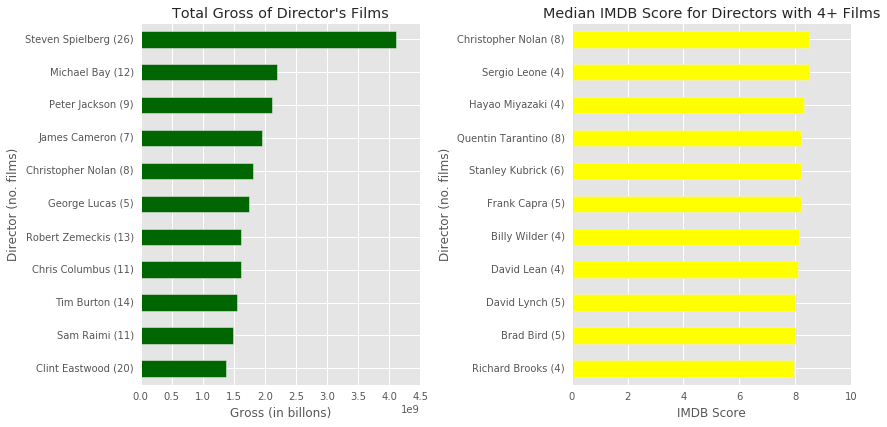

In [175]:
fig = plt.figure(figsize=(18,6))

# Director_name
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('director_name','gross','sum', 0).plot(kind='barh', color='#006600')
plt.legend().set_visible(False)
plt.title("Total Gross of Director's Films")
plt.ylabel("Director (no. films)")
plt.xlabel("Gross (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('director_name','imdb_score','median', 4).plot(kind='barh', color='#ffff00')
plt.legend().set_visible(False)
plt.title('Median IMDB Score for Directors with 4+ Films')
plt.ylabel("Director (no. films)")
plt.xlabel("IMDB Score")
plt.xlim(0,10)

plt.tight_layout()

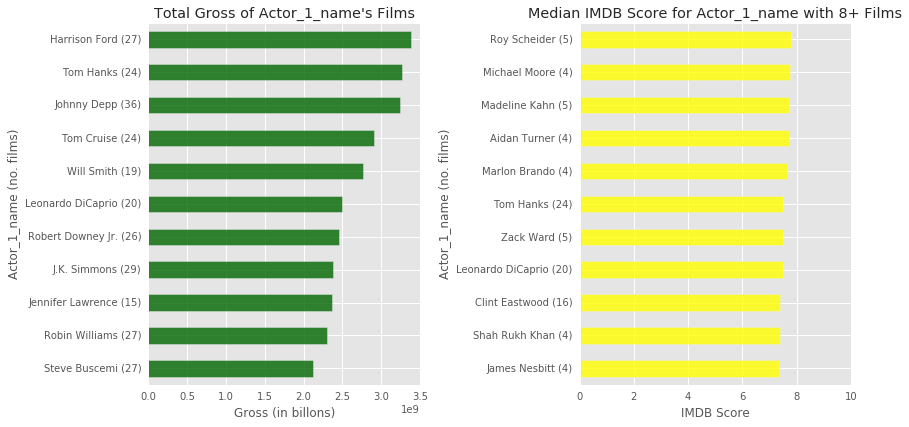

In [176]:
fig = plt.figure(figsize=(18,6))

# Actor_1_name
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('actor_1_name','gross','sum', 0).plot(kind='barh', color='#006600', alpha=.8)
plt.legend().set_visible(False)
plt.title("Total Gross of Actor_1_name's Films")
plt.ylabel("Actor_1_name (no. films)")
plt.xlabel("Gross (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('actor_1_name','imdb_score','median', 4).plot(kind='barh', color='#ffff00', alpha=.8)
plt.legend().set_visible(False)
plt.title('Median IMDB Score for Actor_1_name with 8+ Films')
plt.ylabel("Actor_1_name (no. films)")
plt.xlabel("IMDB Score")
plt.xlim(0,10)

plt.tight_layout()

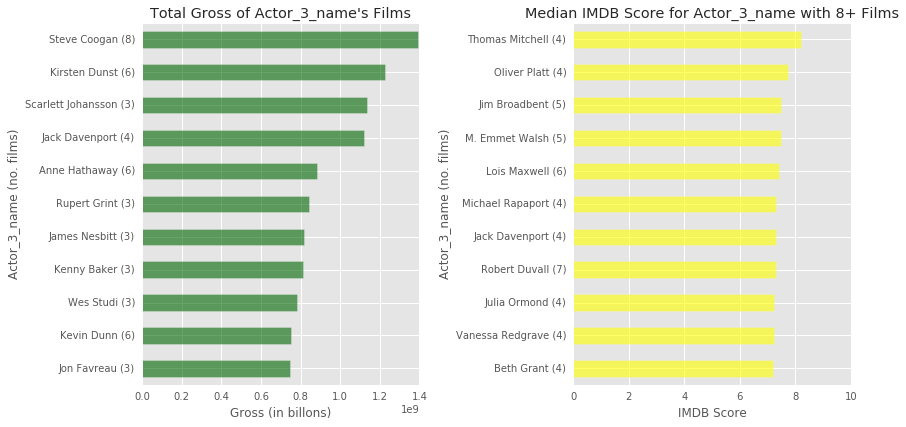

In [177]:
fig = plt.figure(figsize=(18,6))

# Actor_3_name
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('actor_3_name','gross','sum', 0).plot(kind='barh', color='#006600', alpha=.6)
plt.legend().set_visible(False)
plt.title("Total Gross of Actor_3_name's Films")
plt.ylabel("Actor_3_name (no. films)")
plt.xlabel("Gross (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('actor_3_name','imdb_score','median', 4).plot(kind='barh', color='#ffff00', alpha=.6)
plt.legend().set_visible(False)
plt.title('Median IMDB Score for Actor_3_name with 8+ Films')
plt.ylabel("Actor_3_name (no. films)")
plt.xlabel("IMDB Score")
plt.xlim(0,10)

plt.tight_layout()

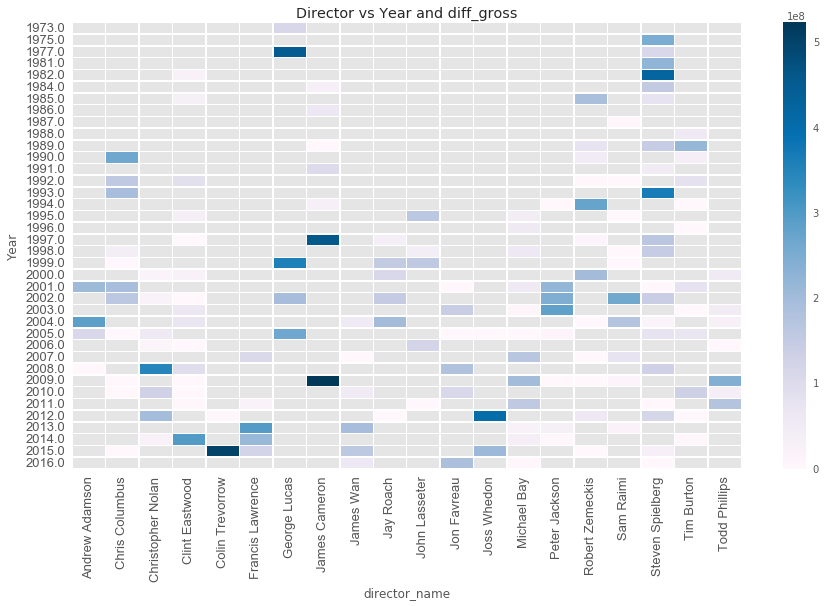

In [184]:
df['diff_gross'] = df['gross'] - df['budget']
df_copy = df.copy().dropna()
director_budge = df_copy.groupby(df_copy['director_name'])['diff_gross'].sum()
direcotr_budge_indx = director_budge.sort_values(ascending=False)[:20].index
director_budge_pivot = pd.pivot_table(data = df_copy[df_copy['director_name'].isin(direcotr_budge_indx)],
                                      index=['title_year'],
                                      columns=['director_name'],
                                      values=['diff_gross'],
                                      aggfunc='sum')


fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(director_budge_pivot['diff_gross'],vmin=0,annot=False,linewidth=.5,ax=ax,cmap='PuBu')
plt.title('Director vs Year and diff_gross')
plt.ylabel('Year')
plt.tick_params(which = 'both', labelsize = 13)
plt.show()

## Keywords

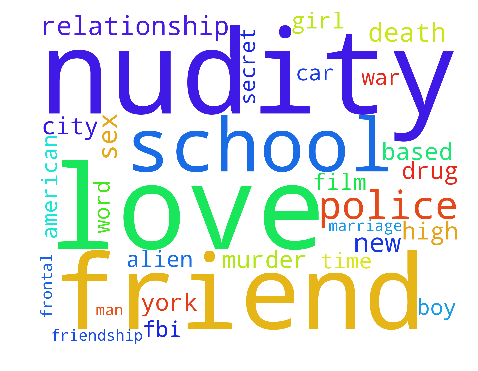

In [137]:
'''
A wordcloud of the top 30 words that appear
'''

df = df[df['num_voted_users'] > 100][['plot_keywords', 'gross', 'budget','duration','imdb_score', 'movie_title']]
# Split the plot_keyword string based on '|' and add an row for each string that is returned
tags = df['plot_keywords'].copy().str.split('|').apply(pd.Series, 1).stack()
tags.index = tags.index.droplevel(-1)
tags.index
tags.name = 'tags'
df = df.join(tags)
count_vect = CountVectorizer(ngram_range=(1,2), stop_words ={'and', 'in', 'of', 'the', 'on','to', 'title','reference',\
                                                             'female','male','by'})

sWords = {'and', 'in', 'of', 'the', 'on','to', 'title','reference','female','male','by'}
tagsString = " ".join(df.tags.dropna().tolist())
wordcloud = WordCloud(stopwords=sWords,
                          background_color='white',
                          max_words = 30,
                          width=2500,
                          height=2000
                         ).generate(tagsString)

plt.rcParams["figure.figsize"] = [10, 6]
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

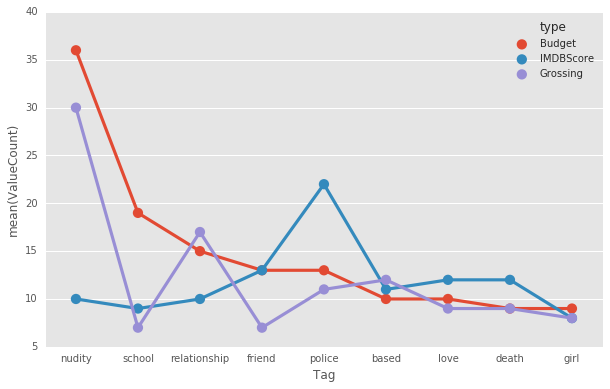

In [151]:
Top250 = df[['movie_title','gross']].drop_duplicates().sort_values('gross').tail(250)
Top250Grossing = Top250.join(df[['tags']])
X_train_counts = count_vect.fit_transform(Top250Grossing.tags.dropna())
MaxFeatureValues = X_train_counts.todense().sum(axis = 0).tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(MaxFeatureValues)), MaxFeatureValues) if pair[1] > 0]
TopTags = sorted(phrase_scores, key=lambda t: t[1] * -1)[:30]
ind = [x[0] for x in TopTags]
featurelist = count_vect.get_feature_names()
topValues250Grossing = [x[1] for x in TopTags]
TopTagsNames250Grossing = [featurelist[j] for j in ind]

Top250 = df[['movie_title','budget']].drop_duplicates().sort_values('budget').tail(250)
Top250Budget = Top250.join(df[['tags']])
X_train_counts = count_vect.fit_transform(Top250Budget.tags.dropna())
MaxFeatureValues = X_train_counts.todense().sum(axis = 0).tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(MaxFeatureValues)), MaxFeatureValues) if pair[1] > 0]
TopTags = sorted(phrase_scores, key=lambda t: t[1] * -1)[:30]
ind = [x[0] for x in TopTags]
featurelist = count_vect.get_feature_names()
topValues250Budget = [x[1] for x in TopTags]
TopTagsNames250Budget = [featurelist[j] for j in ind]

commonTags = list(set(TopTagsNames250Budget).intersection(TopTagsNames250Grossing).intersection(TopTagsNamesIMDB250))

Top250Budget = pd.DataFrame({'Tag':TopTagsNames250Budget,'ValueCount':topValues250Budget})
Top250IMDB = pd.DataFrame({'Tag':TopTagsNamesIMDB250,'ValueCount':topValuesIMDB250})
Top250Gross = pd.DataFrame({'Tag':TopTagsNames250Grossing,'ValueCount':topValues250Grossing})

Top250BudgetFiltered = Top250Budget.copy()[Top250Budget['Tag'].isin(commonTags)]
Top250BudgetFiltered['type'] = 'Budget'
Top250GrossFiltered = Top250Gross.copy()[Top250Gross['Tag'].isin(commonTags)]
Top250GrossFiltered['type'] = 'Grossing'
Top250BudgetFiltered = Top250BudgetFiltered.append(Top250IMDBFiltered).append(Top250GrossFiltered)
sns.pointplot(x="Tag", y="ValueCount", hue="type", data=Top250BudgetFiltered)
plt.show()

## Money Genre and Year

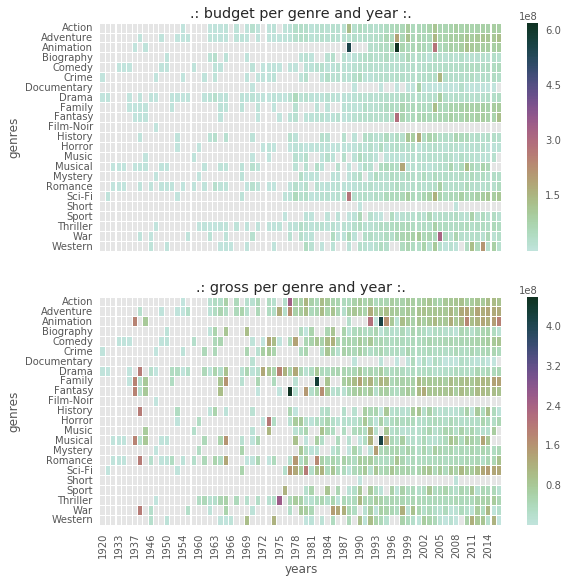

In [172]:
"""
This is the money per genre per year, scaled by 100 Million dollars.
Animations seem to make a lot, but also seem more costly to make.

Adventure and Family are also making a lot.
They cost more to make too.
"""

genre_year = df_genre.groupby(['genre', 'year']).mean().reset_index()
df_gyBudget = genre_year.pivot_table(index = 'genre', columns = 'year', values = 'budget', aggfunc = np.mean)
df_gyGross = genre_year.pivot_table(index = 'genre', columns = 'year', values = 'gross', aggfunc = np.mean)

f, [axA, axB] = plt.subplots(figsize = (9, 9), nrows = 2)
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)

sns.heatmap(df_gyBudget, xticklabels = 3, cmap = cmap, linewidths = 0.05, ax = axA)
sns.heatmap(df_gyGross, xticklabels = 3, cmap = cmap, linewidths = 0.05, ax = axB)

axA.set_title('.: budget per genre and year :.')
axA.set_xlabel('')
axA.set_ylabel('genres')
axA.set_xticklabels([])
axB.set_title('.: gross per genre and year :.')
axB.set_xlabel('years')
axB.set_ylabel('genres')

plt.show()